# Homework 7

---

## Q1: derive the following

1. $p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma=\sigma^2 I)$ for the **linear regression model** likelihood proportional to $\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)$ and a $\mathcal{MVN}(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta)$ for $\boldsymbol\beta$

2. The analytical posterior distribution for $\sigma^2$ the **error variance** of a **linear regression model** with **design matrix** $\mathbf{X}$ assuming $\sigma^2$ has an **inverse-gamma** prior distribution with parameters $\alpha^*$ and $\beta^*$ (unrelated to $\boldsymbol \beta$).

### [Optional] Q1 Extra: derive the following

Show that for $s_i=1$ and **hyperparameters** $b_i=0$ (ignoring normalizing proportionality constants) the log posterior distributions for $\beta$ using either **normal** or **Laplace** prior distributions have analagous forms to the **ridge** and **lasso** loss functions.

*Note though that Bayesians do not optimize posterior distributions, they sample from them; but, nonetheless, the posterior distributions serve to provided 'regularizeations' of the likelihood through the prior.*



### Derivation of $p(\beta | \textbf{y}, \textbf{X}, \Sigma = \sigma^2 I)$

Likelihood for the linear regression model is

$$ p(y | X, \beta, \Sigma) \propto \exp \left( -\frac{1}{2} (y - X\beta)^T \Sigma^{-1} (y - X\beta) \right) = \exp \left( -\frac{1}{2\sigma^2} (y - X\beta)^T (y - X\beta) \right). $$

Multivariate normal prior on $\beta$:

$$ p(\beta) = \mathcal{MVN} (\beta_0, \Sigma_\beta) \propto \exp \left( -\frac{1}{2} (\beta - \beta_0)^T \Sigma_\beta^{-1} (\beta - \beta_0) \right).$$

Thus, the unnormalized posterior is:
$$
\begin{align*}
p(\beta | y, X, \Sigma) &\propto p(y | X, \beta, \Sigma) p(\beta) \\
&\propto \exp \left( -\frac{1}{2\sigma^2} (y - X\beta)^T (y - X\beta) \right) \cdot \exp \left( -\frac{1}{2} (\beta - \beta_0)^T \Sigma_\beta^{-1} (\beta - \beta_0) \right) \\
&= \exp \left( -\frac{1}{2} \left[ \beta^T \left( \frac{X^T X}{\sigma^2} + \Sigma_\beta^{-1} \right) \beta - 2 \beta^T \left( \frac{X^T y}{\sigma^2} + \Sigma_\beta^{-1} \beta_0 \right) + C \right] \right).
\end{align*}
$$

Recognizing this as the kernel of a multivariate normal distribution, we conclude:

$$p(\beta | y, X, \Sigma) = \mathcal{MVN} \left( \mu_{\beta|y}, \Sigma_{\beta|y} \right),$$

where

$$ \Sigma_{\beta|y} = \left( \frac{X^T X}{\sigma^2} + \Sigma_\beta^{-1} \right)^{-1}, \quad
\mu_{\beta|y} = \Sigma_{\beta|y} \left( \frac{X^T y}{\sigma^2} + \Sigma_\beta^{-1} \beta_0 \right).$$

---

### Posterior  of $\sigma^2$ 

Likelihood (in terms of $\sigma^2$):

$$ p(y | X, \beta, \sigma^2) \propto (\sigma^2)^{-n/2} \exp \left( -\frac{1}{2\sigma^2} (y - X\beta)^T (y - X\beta) \right).$$

Inverse-gamma prior for $\sigma^2$:

$$p(\sigma^2) = IG(\alpha_0, \beta_0) \propto (\sigma^2)^{-\alpha_0 - 1} \exp \left( -\frac{\beta_0}{\sigma^2} \right).$$

The conditional posterior (given $\beta$):

$$
\begin{align*}
p(\sigma^2 | y, X, \beta) &\propto (\sigma^2)^{-n/2} \exp \left( -\frac{1}{2\sigma^2} (y - X\beta)^T (y - X\beta) \right) \times (\sigma^2)^{-\alpha_0 - 1} \exp \left( -\frac{\beta_0}{\sigma^2} \right) \\
&= (\sigma^2)^{-\left( \alpha_0 + \frac{n}{2} + 1 \right)} \exp \left( -\frac{1}{\sigma^2} \left[ \beta_0 + \frac{1}{2} (y - X\beta)^T (y - X\beta) \right] \right).
\end{align*}
$$

Recognizing this as the kernel of an inverse-gamma distribution, the posterior is:

$$\sigma^2 | y, X, \beta \sim IG \left( \alpha_0 + \frac{n}{2}, \, \beta_0 + \frac{1}{2} (y - X\beta)^T (y - X\beta) \right).$$

---

### Extra: Ridge and Lasso via log-posterior

For a Gaussian prior on $\beta$, $\beta_i \sim \mathcal{N}(0, \tau^2)$:

$$
p(\beta) \propto \exp \left( -\frac{1}{2 \tau^2} \sum_i \beta_i^2 \right).
$$

Thus, the log-posterior is:

$$
\log p(\beta | y, X) = -\frac{1}{2\sigma^2} (y - X\beta)^T (y - X\beta) - \frac{1}{2 \tau^2} \sum_i \beta_i^2 + C,
$$

which corresponds to ridge regression penalty (L2).

For a Laplace prior on $\beta$, $\beta_i \sim \text{Laplace}(0, b)$:

$$
p(\beta) \propto \exp \left( -\frac{1}{b} \sum_i |\beta_i| \right).
$$

Thus, the log-posterior is:

$$
\log p(\beta | y, X) = -\frac{1}{2\sigma^2} (y - X\beta)^T (y - X\beta) - \frac{1}{b} \sum_i |\beta_i| + C,
$$

which corresponds to lasso regression penalty (L1).

While Bayesians typically sample from these posteriors, if one were to maximize them (MAP estimate), the resulting optimization problem would correspond to ridge (Gaussian prior) and lasso (Laplace prior) regression.




## Q2: Bayesian Linear Regression

- For any data set you find interesting (perhaps from kaggle.com?)
- Use an appropriate non **inverse-gamma** prior for `sigma` 
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than a `pm.MvNormal` alternative
- Use `pm.Normal('y', mu=X@betas, sigma=sigma, observed=y)` rather than `pm.MvNormal` alternative
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

### [Optional] Q2 Extra: perform generalized Bayesian Linear Regression

Replace the residual distribution and use an appropriate link function



In [2]:
%%capture
!pip install kagglehub

In [3]:
import kagglehub, os
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("yasserh/wine-quality-dataset")
file_path = os.path.join(path, 'WineQT.csv')

data = pd.read_csv(file_path)

data.head()

print(data.shape)

# print(os.listdir(path))

(1143, 13)


In [4]:
data.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
def standardize(X):
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    X_standardized = (X - X_mean) / X_std
    return X_standardized

np.random.seed(30)

sample_50 = data.sample(n=5)
sample_100 = data.sample(n=100)
sample_500 = data.sample(n=500)

print(sample_50.shape, sample_100.shape, sample_500.shape)

X_50 = sample_50.drop(columns=['quality']).values
y_50 = sample_50['quality'].values

X_100 = sample_100.drop(columns=['quality']).values
y_100 = sample_100['quality'].values

X_500 = np.array(standardize(sample_500.drop(columns=['quality']).values)) # proceed with standardized X
y_500 = np.array(sample_500['quality'].values)



print(X_50.shape, y_50.shape, X_100.shape, y_100.shape, X_500.shape, y_500.shape)


(5, 13) (100, 13) (500, 13)
(5, 12) (5,) (100, 12) (100,) (500, 12) (500,)


In [8]:
p = X_500.shape[1]

with pm.Model() as model_500:
    
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    mu = pm.math.dot(X_500, betas)
    
    # Likelihood
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y_500)
    
    idata = pm.sample()

az.summary(idata)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.029,0.497,-0.915,0.958,0.010,0.007,2440.0,2858.0,1.0
betas[1],-0.159,0.309,-0.739,0.403,0.005,0.004,3758.0,3547.0,1.0
betas[2],0.038,0.396,-0.714,0.765,0.007,0.005,3372.0,3164.0,1.0
betas[3],0.018,0.298,-0.511,0.593,0.005,0.004,3139.0,2970.0,1.0
betas[4],-0.045,0.281,-0.561,0.485,0.004,0.004,3943.0,3139.0,1.0
betas[5],0.060,0.337,-0.580,0.689,0.006,0.005,3195.0,3105.0,1.0
betas[6],-0.129,0.333,-0.732,0.514,0.006,0.004,3016.0,3145.0,1.0
betas[7],-0.026,0.476,-0.926,0.843,0.010,0.007,2117.0,2790.0,1.0
betas[8],-0.074,0.360,-0.757,0.572,0.007,0.005,2875.0,2956.0,1.0
betas[9],0.160,0.283,-0.332,0.722,0.004,0.004,4313.0,3537.0,1.0


array([[<Axes: title={'center': 'betas\n0'}>,
        <Axes: title={'center': 'betas\n1'}>,
        <Axes: title={'center': 'betas\n2'}>,
        <Axes: title={'center': 'betas\n3'}>],
       [<Axes: title={'center': 'betas\n4'}>,
        <Axes: title={'center': 'betas\n5'}>,
        <Axes: title={'center': 'betas\n6'}>,
        <Axes: title={'center': 'betas\n7'}>],
       [<Axes: title={'center': 'betas\n8'}>,
        <Axes: title={'center': 'betas\n9'}>,
        <Axes: title={'center': 'betas\n10'}>,
        <Axes: title={'center': 'betas\n11'}>],
       [<Axes: title={'center': 'sigma'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

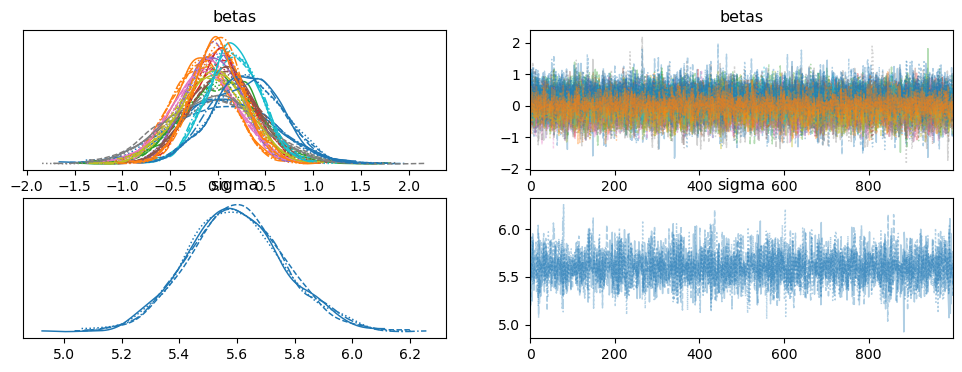

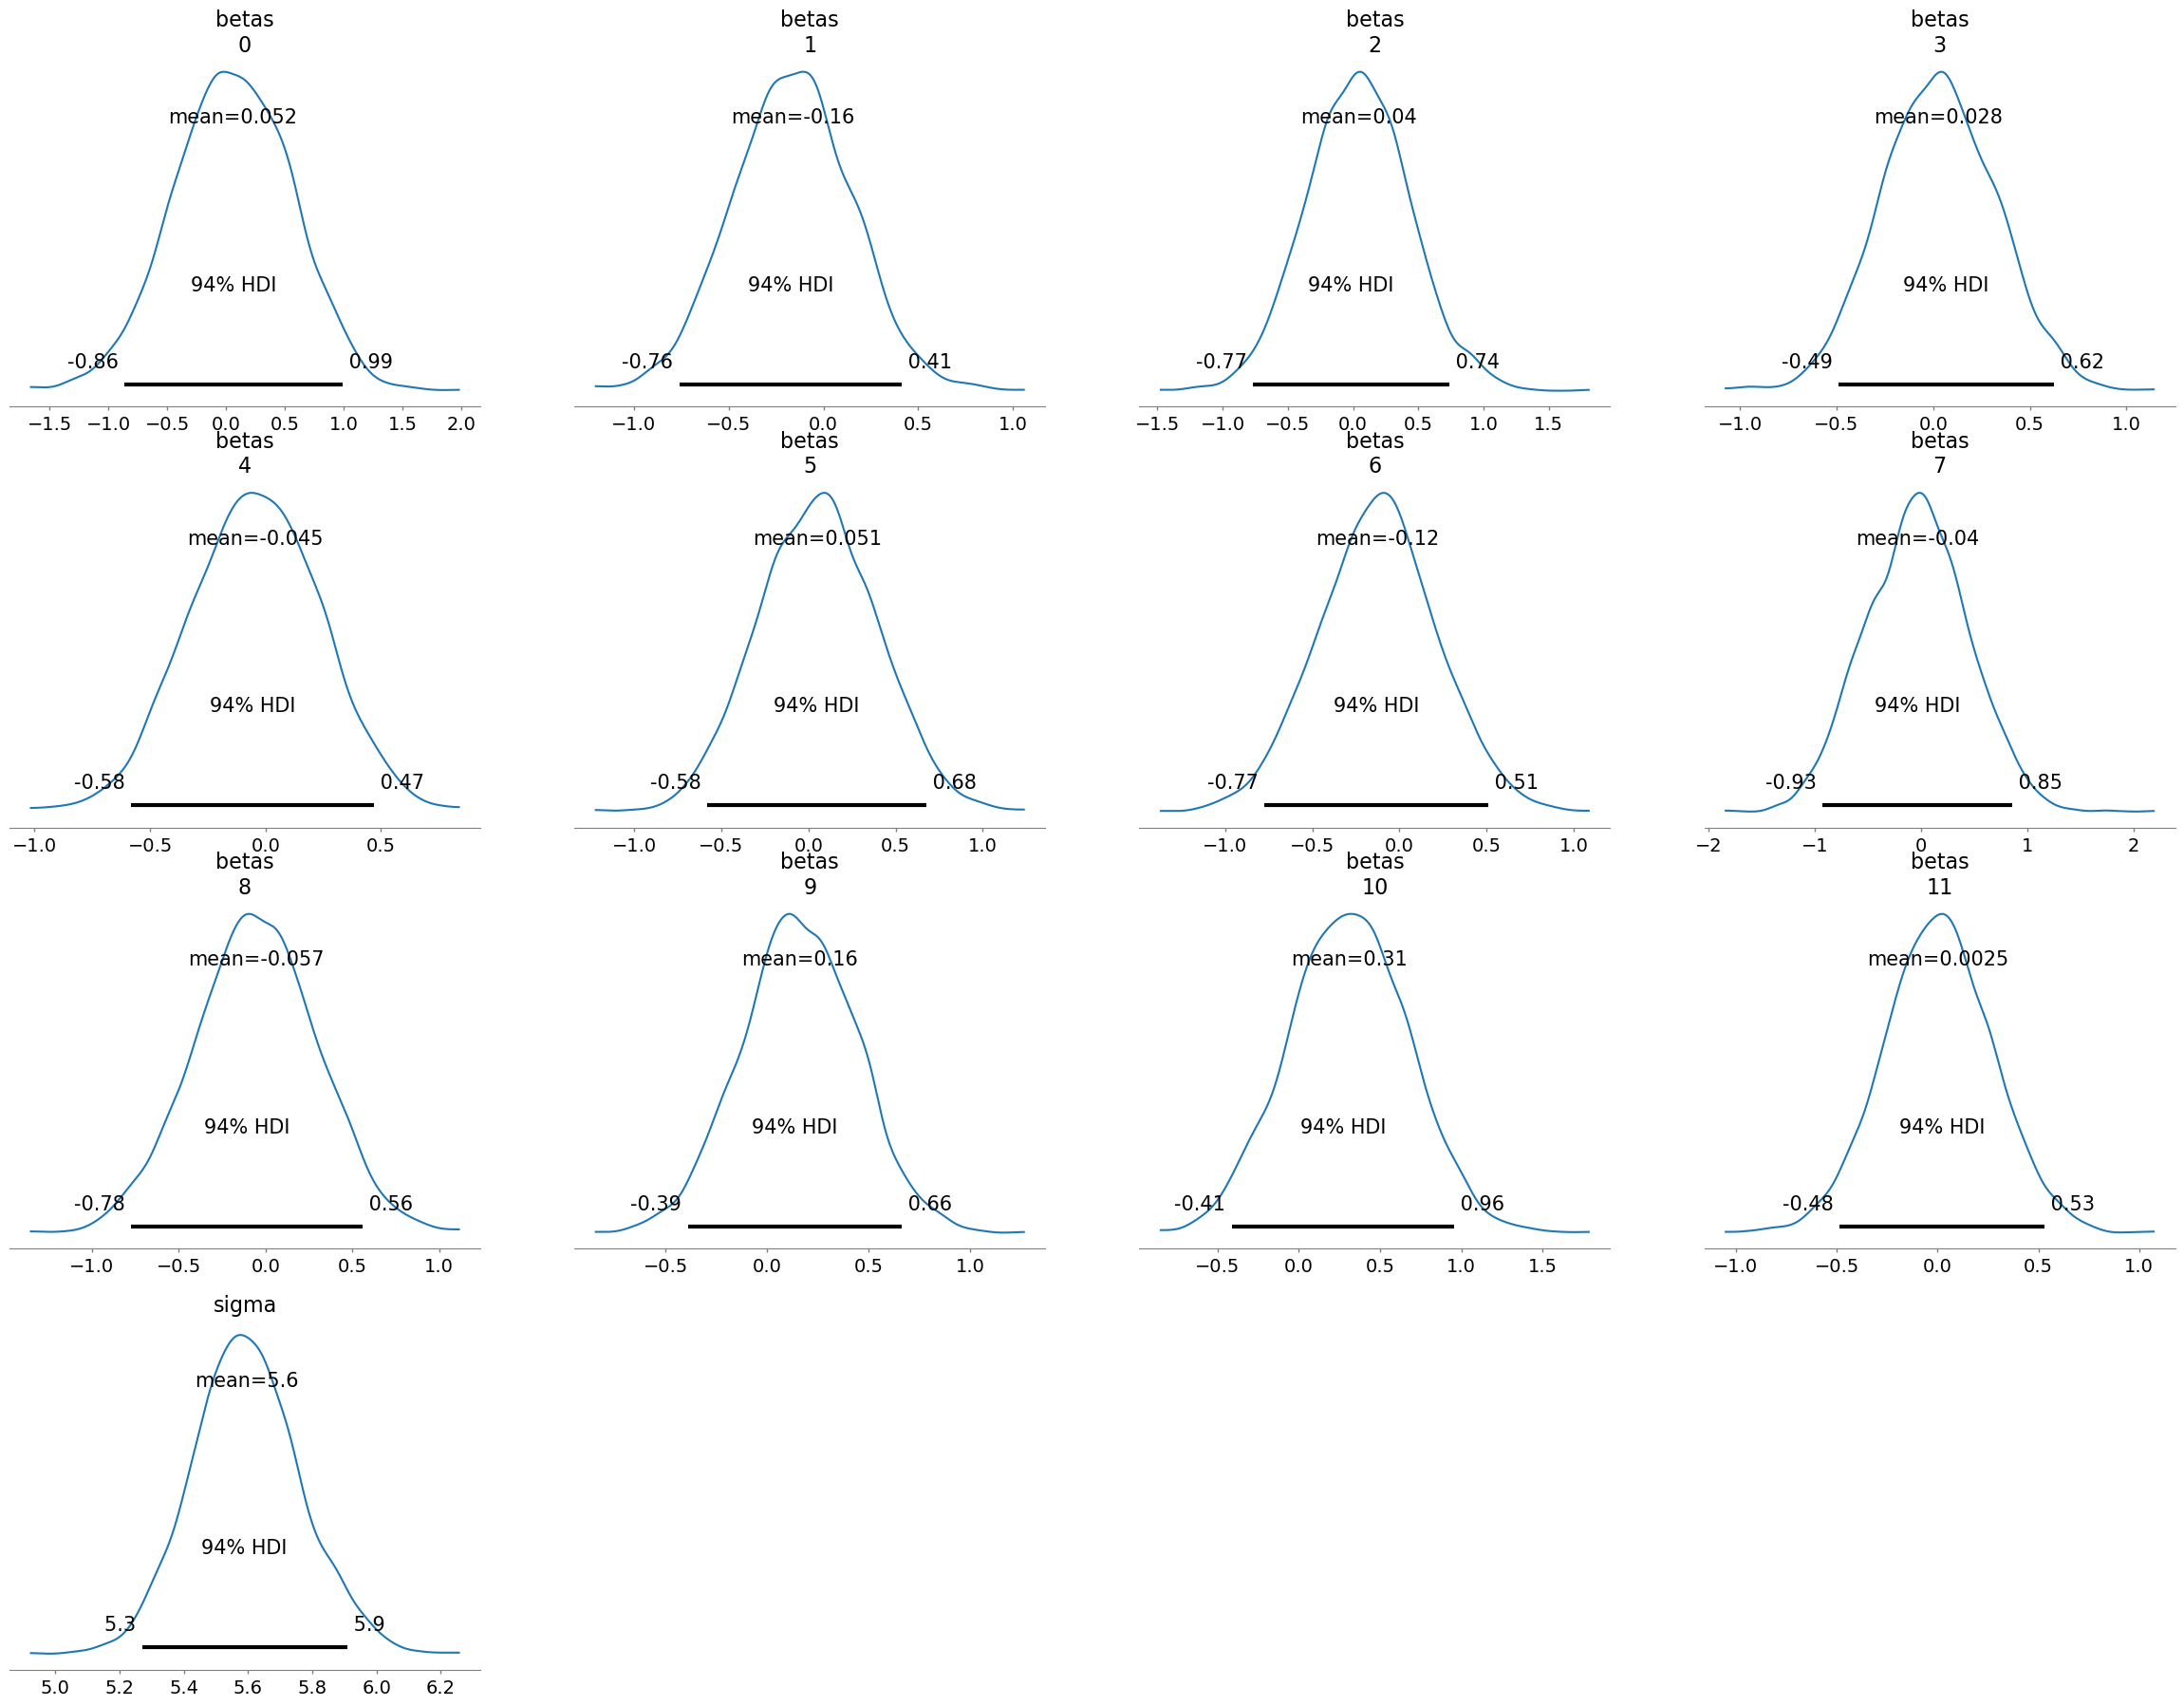

In [62]:
az.plot_trace(idata)
az.plot_posterior(idata)

By standardizing the predictors, we ensure that all regression coefficients are directly comparable on the same scale. This also helps with MCMC convergence and interpretation, as the priors are now applied to standardized variables. The posterior means of the regression coefficients are generally close to zero, with many HDIs containing zero, indicating considerable uncertainty about the influence of individual predictors. A few coefficients, such as betas\[9\] and betas\[10\] exhibit larger posterior means, though their intervals still include zero, suggesting that while there may be modest effects, these are not strongly distinguishable from zero given the data. The estimated residual standard deviation reflects substantial unexplained variability in wine quality, implying that the chemical predictors account for only part of the variation in the response.

Diagnostics indicate that the MCMC sampling performed well, with no signs of convergence issues. All r-hat statistics are close to 1.0, suggesting that the chains have mixed and converged properly. Effective sample sizes for both bulk and tail estimates are large, confirming that posterior estimates are based on a sufficient number of effective samples for stable inference. Trace plots of the regression coefficients and residual standard deviation show good mixing and no concerning patterns such as trends or stickiness, supporting the validity of the posterior draws. The posterior density plots show well-behaved, approximately symmetric distributions, though the fact that many are tightly centered around zero is consistent with the lack of strong effects identified in the coefficient summary. Overall, both the inference and the diagnostics suggest that while the model is well-specified and MCMC performance is good, the standardized predictors do not exhibit substantial linear effects on wine quality in this sample.

Below, after fitting a Poisson GLM, we observe a clearer identification of some predictors with potentially stronger effects. Notably, several regression coefficients exhibit narrower credible intervals and posterior means that are more separated from zero compared to the standard linear regression model. For example, betas\[1\], betas\[6\], and betas\[10\]have HDIs that do not include zero. These demonstrate that a GLM may better capture the underlying relationships in the data by aligning more closely with the nature of the wine quality score as a bounded, potentially ordinal variable.


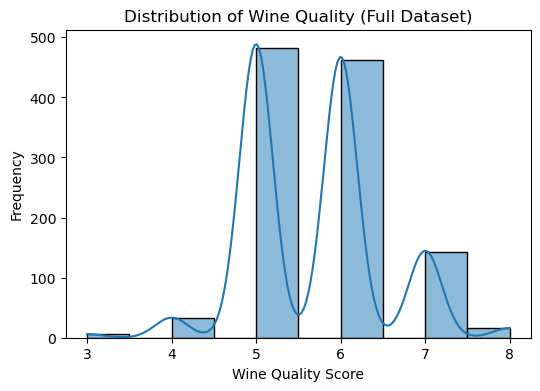

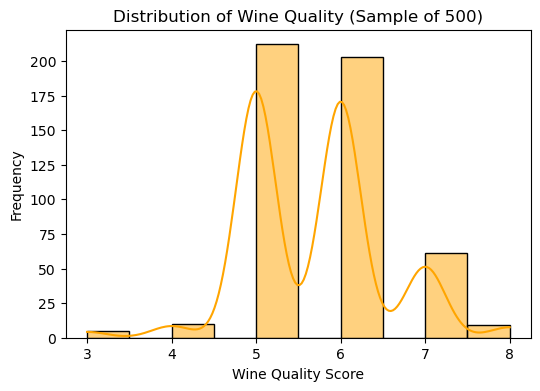

In [7]:
plt.figure(figsize=(6, 4))
sns.histplot(data['quality'], kde=True, bins=10)
plt.title('Distribution of Wine Quality (Full Dataset)')
plt.xlabel('Wine Quality Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(sample_500['quality'], kde=True, bins=10, color='orange')
plt.title('Distribution of Wine Quality (Sample of 500)')
plt.xlabel('Wine Quality Score')
plt.ylabel('Frequency')
plt.show()

In [28]:
with pm.Model() as Poisson:
    
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    mu = pm.math.dot(X_500, betas)
    
    # rate parameter via log link
    lambda_ = pm.math.exp(mu)
    
    # Poisson likelihood
    y_obs = pm.Poisson('y_obs', mu=lambda_, observed=y_500)
    
    idata_poisson = pm.sample()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


In [63]:
az.summary(idata_poisson)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],-0.018,0.109,-0.216,0.192,0.002,0.002,2286.0,2794.0,1.0
betas[1],-0.193,0.066,-0.315,-0.071,0.001,0.001,3335.0,3301.0,1.0
betas[2],-0.015,0.082,-0.170,0.143,0.001,0.001,3741.0,3215.0,1.0
betas[3],-0.010,0.059,-0.124,0.093,0.001,0.001,3033.0,3002.0,1.0
betas[4],-0.036,0.053,-0.137,0.063,0.001,0.001,4219.0,3097.0,1.0
betas[5],0.074,0.064,-0.044,0.193,0.001,0.001,3318.0,2963.0,1.0
betas[6],-0.154,0.071,-0.289,-0.021,0.001,0.001,3254.0,2808.0,1.0
betas[7],0.065,0.111,-0.135,0.277,0.003,0.002,1921.0,2468.0,1.0
betas[8],-0.092,0.075,-0.239,0.039,0.001,0.001,2580.0,3339.0,1.0
betas[9],0.117,0.046,0.032,0.203,0.001,0.001,3302.0,2798.0,1.0


array([[<Axes: title={'center': 'betas\n0'}>,
        <Axes: title={'center': 'betas\n1'}>,
        <Axes: title={'center': 'betas\n2'}>],
       [<Axes: title={'center': 'betas\n3'}>,
        <Axes: title={'center': 'betas\n4'}>,
        <Axes: title={'center': 'betas\n5'}>],
       [<Axes: title={'center': 'betas\n6'}>,
        <Axes: title={'center': 'betas\n7'}>,
        <Axes: title={'center': 'betas\n8'}>],
       [<Axes: title={'center': 'betas\n9'}>,
        <Axes: title={'center': 'betas\n10'}>,
        <Axes: title={'center': 'betas\n11'}>]], dtype=object)

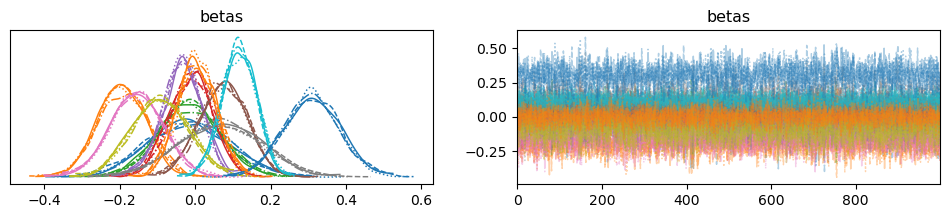

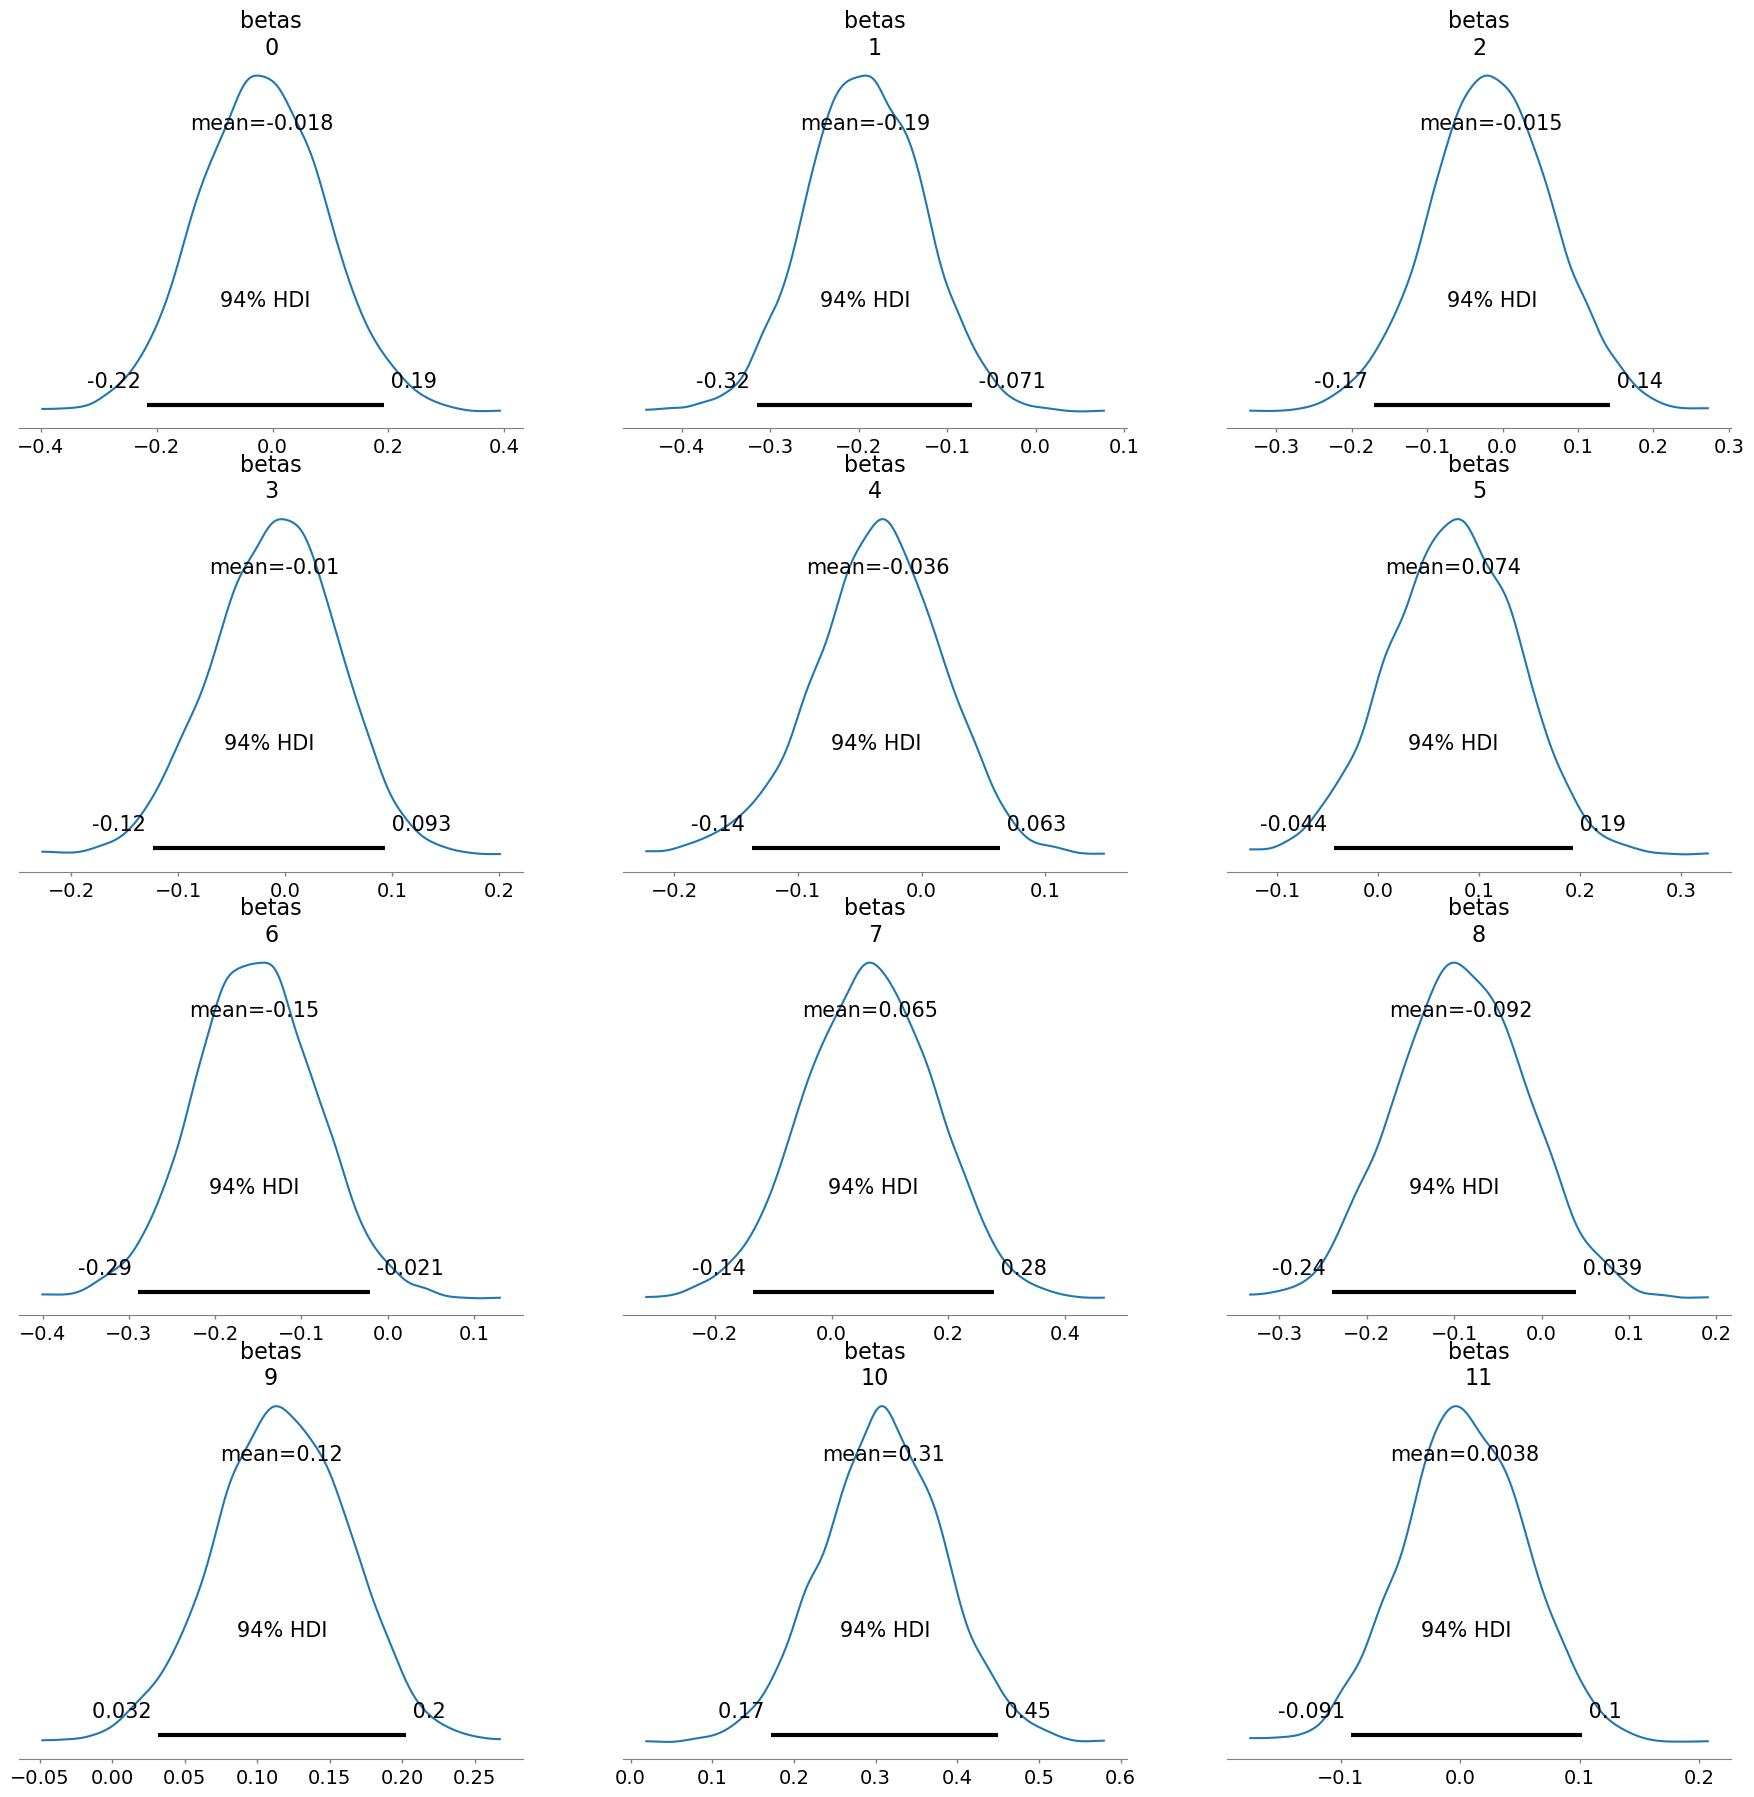

In [64]:
az.plot_trace(idata_poisson)
az.plot_posterior(idata_poisson)

## Q3: Robust Bayesian Linear Regression

Let $p(\tau_i)$ be $\require{cancel} \textrm{gamma}\big(\tau_i | \alpha = \frac{\nu}{2}, \overset{\textrm{rate}\xcancel{\textrm{scale}}}{\beta = \frac{\nu}{2}}\big)$ and let $p(y_i|\boldsymbol \beta, \tau,\tau_i)$ be $\mathcal{N}(y_i | \textbf{X} \boldsymbol \beta, \overset{\textrm{precision}}{\tau \times \tau_i})$. 

- Return to your dataset and manipulate it to have some various outliers or find another dataset with some outlier data
- Use an appropriate prior for inference on $v$ if you have enough data to do so
- Use the posterior distributions of the $\tau_i$'s to identify data point "outliers" 
- Use the posterior distributions of the $\sigma_i^{-2} = \tau \times \tau_i$ to create posterior distribuitions of the **influence** (the diagonals of the $H$ "hat" matrix $X^\top (X^\top D X)^{-1} X$ where $D_{ij}=0$ and $D_{ii} = \sigma^2_i$) and compare and contras some example "outlier" versus "non outlier" data points

- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

### [Optional] Q3 Extra: measurement error models?

What if $\textbf{x}_i = \textbf{x}_i^{true} + \eta_i, \eta_i \sim \mathcal{MVN}(\textbf{0}, \Sigma)$ for some kind of measurement error covariance structure $\Sigma$ and $\mathcal N (y_i| \textbf{X}^{true}\boldsymbol \beta, \sigma)$?





In [31]:
n, p = X_500.shape  # 500, number of predictors

with pm.Model() as robust:
    # priors
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    tau = pm.Gamma('tau', alpha=2, beta=2) 

    # latent variables for each observation (tau_i)
    nu = 4  # dof for t-like heavy tails
    # nu = pm.Exponential('nu', 1/30)
    tau_i = pm.Gamma('tau_i', alpha=nu / 2, beta=nu / 2, shape=n)  # individual precision

    # likelihood 
    mu = pm.math.dot(X_500, betas)
    pm.Normal('y_obs', mu=mu, sigma=pm.math.sqrt(1 / (tau * tau_i)), observed=y_500)

    idata_robust = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, tau, tau_i]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 12 seconds.


In [10]:
az.summary(idata_robust, var_names=["betas", "tau"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.040,0.576,-1.028,1.145,0.008,0.006,5872.0,5492.0,1.0
betas[1],-0.182,0.397,-0.902,0.583,0.005,0.004,6475.0,6204.0,1.0
betas[2],0.030,0.490,-0.926,0.912,0.007,0.005,5634.0,5709.0,1.0
betas[3],-0.036,0.373,-0.752,0.641,0.005,0.004,5522.0,4998.0,1.0
betas[4],-0.092,0.363,-0.817,0.549,0.004,0.004,6744.0,5683.0,1.0
betas[5],0.033,0.413,-0.710,0.829,0.005,0.004,6080.0,6199.0,1.0
betas[6],-0.119,0.420,-0.861,0.710,0.006,0.004,5506.0,5943.0,1.0
betas[7],-0.018,0.553,-1.059,1.031,0.007,0.007,5501.0,5569.0,1.0
betas[8],-0.055,0.441,-0.893,0.745,0.005,0.004,6637.0,6770.0,1.0
betas[9],0.108,0.357,-0.578,0.746,0.004,0.004,6795.0,5137.0,1.0


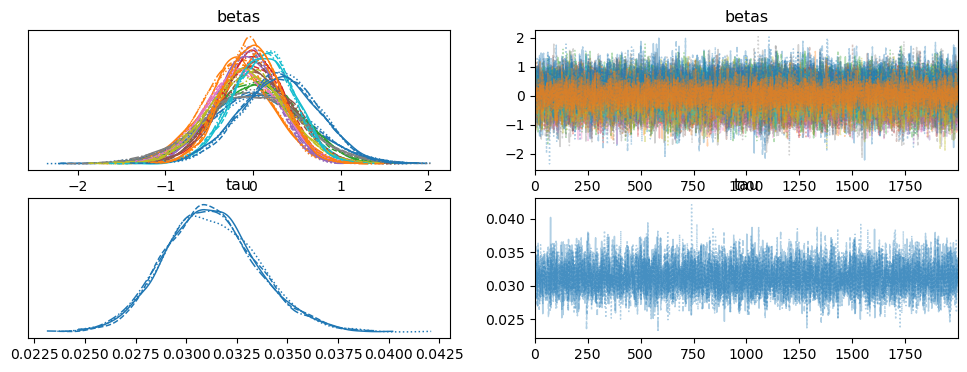

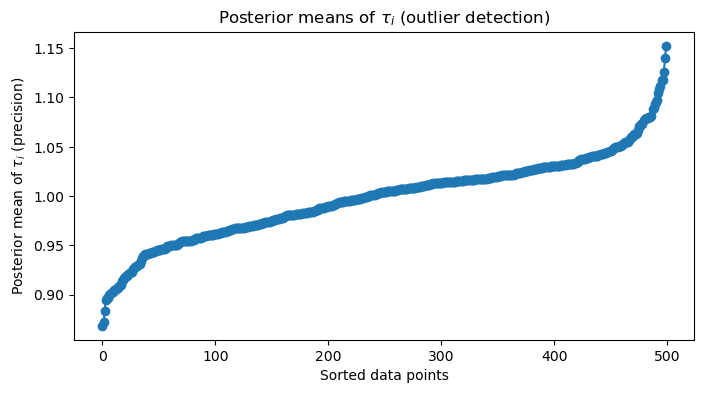

In [11]:
az.plot_trace(idata_robust, var_names=["betas", "tau"])
plt.show()

# posterior means of tau_i
tau_i_means = idata_robust.posterior['tau_i'].mean(dim=("chain", "draw")).values

# visualize sorted tau_i to find outliers
plt.figure(figsize=(8, 4))
plt.plot(np.sort(tau_i_means), marker='o')
plt.xlabel('Sorted data points')
plt.ylabel('Posterior mean of $\\tau_i$ (precision)')
plt.title('Posterior means of $\\tau_i$ (outlier detection)')
plt.show()

In [12]:
outlier_idx = np.argmin(tau_i_means)  # smallest tau_i (highest variance)
inlier_idx = np.argmax(tau_i_means)   # largest tau_i (lowest variance)

print("Outlier candidate (lowest tau_i):", sample_500.iloc[outlier_idx])
print("Inlier candidate (highest tau_i):", sample_500.iloc[inlier_idx])

Outlier candidate (lowest tau_i): fixed acidity            12.6000
volatile acidity          0.3100
citric acid               0.7200
residual sugar            2.2000
chlorides                 0.0720
free sulfur dioxide       6.0000
total sulfur dioxide     29.0000
density                   0.9987
pH                        2.8800
sulphates                 0.8200
alcohol                   9.8000
quality                   8.0000
Id                      440.0000
Name: 310, dtype: float64
Inlier candidate (highest tau_i): fixed acidity            11.6000
volatile acidity          0.5800
citric acid               0.6600
residual sugar            2.2000
chlorides                 0.0740
free sulfur dioxide      10.0000
total sulfur dioxide     47.0000
density                   1.0008
pH                        3.2500
sulphates                 0.5700
alcohol                   9.0000
quality                   3.0000
Id                      459.0000
Name: 324, dtype: float64


100%|██████████| 500/500 [00:00<00:00, 1058.66it/s]


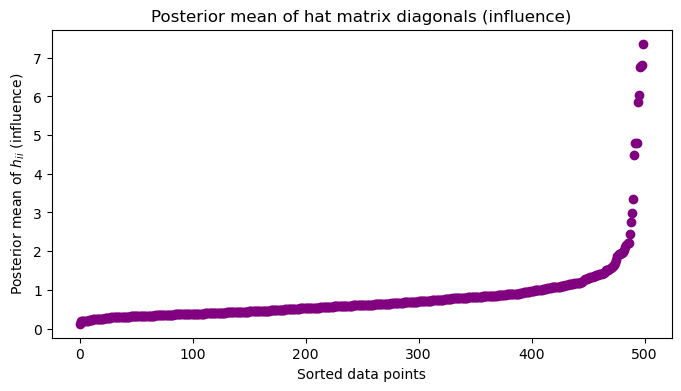

Top 10 influential data points based on hat matrix:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
973             8.7              0.78         0.51             1.7      0.415   
64              8.6              0.49         0.28             1.9      0.110   
490             8.6              0.49         0.51             2.0      0.422   
339            10.6              0.28         0.39            15.5      0.069   
1022           10.2              0.54         0.37            15.4      0.214   
161             8.9              0.59         0.50             2.0      0.337   
1053            9.9              0.50         0.50            13.8      0.205   
1051            9.9              0.50         0.50            13.8      0.205   
30              7.5              0.49         0.20             2.6      0.332   
1111            6.9              0.63         0.33             6.7      0.235   

      free sulfur dioxide  total sulfur dioxide  densit

In [24]:
# Extract posterior draws for tau and tau_i correctly
tau_draws = idata_robust.posterior['tau'].stack(sample=("chain", "draw")).values  # (n_draws,)
tau_i_draws = idata_robust.posterior['tau_i'].stack(sample=("chain", "draw")).transpose('sample', 'tau_i_dim_0').values

n_draws_total = tau_draws.shape[0]
n_obs = X_500.shape[0]
p = X_500.shape[1]

# Number of posterior draws to sample for approximation
n_draws_sample = 500
sample_indices = np.random.choice(n_draws_total, size=n_draws_sample, replace=False)

# Store diagonals of hat matrices for each draw
H_diag_all = np.zeros((n_draws_sample, n_obs))

# Loop over selected posterior draws
from tqdm import tqdm  # If you want a progress bar

for idx, draw_idx in tqdm(enumerate(sample_indices), total=n_draws_sample):
    tau_draw = tau_draws[draw_idx]  
    tau_i_draw = tau_i_draws[draw_idx, :]
    
    # Compute D matrix: diag(tau * tau_i)
    D = np.diag(tau_draw * tau_i_draw)
    
    # Compute (X^T D X)^(-1)
    XtDX_inv = np.linalg.inv(X_500.T @ D @ X_500)
    
    # Compute hat matrix H = X (X^T D X)^(-1) X^T
    H = X_500 @ XtDX_inv @ X_500.T
    
    # Extract diagonal (influence measures)
    H_diag = np.diag(H)
    
    H_diag_all[idx, :] = H_diag

# Posterior mean of H diagonals
H_diag_mean = H_diag_all.mean(axis=0)

plt.figure(figsize=(8, 4))
plt.plot(np.sort(H_diag_mean), marker='o', linestyle='', color='purple')
plt.xlabel('Sorted data points')
plt.ylabel('Posterior mean of $h_{ii}$ (influence)')
plt.title('Posterior mean of hat matrix diagonals (influence)')
plt.show()

influential_idx = np.argsort(-H_diag_mean)[:10] 
print("Top 10 influential data points based on hat matrix:\n", sample_500.iloc[influential_idx])



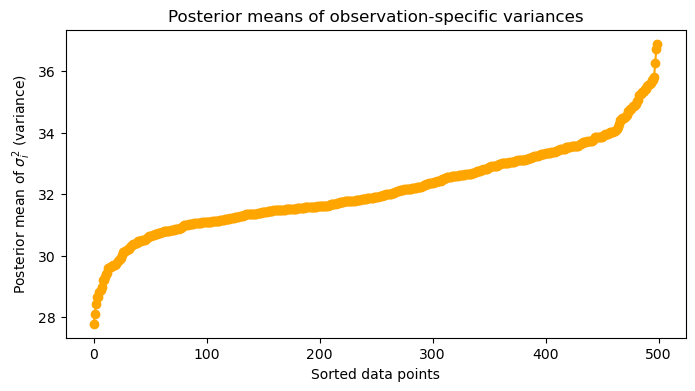

In [13]:
tau_post_mean = idata_robust.posterior['tau'].mean(dim=("chain", "draw")).values
sigma_i_sq = 1 / (tau_post_mean * tau_i_means)

plt.figure(figsize=(8, 4))
plt.plot(np.sort(sigma_i_sq), marker='o', color='orange')
plt.xlabel('Sorted data points')
plt.ylabel('Posterior mean of $\\sigma_i^2$ (variance)')
plt.title('Posterior means of observation-specific variances')
plt.show()

To account for potential outliers in the wine quality data, we fitted a robust Bayesian linear regression model to allow individual observations to have their own error variance. This was achieved by introducing latent precision parameters $\tau_i$'s, drawn from a Gamma prior. This formulation enables the model to weight  down the influence of potential outliers by increasing their estimated variance. By modeling $\tau_i \sim \text{Gamma}\left( \frac{\nu}{2}, \frac{\nu}{2} \right)$ and combining this with a shared precision parameter $\tau$, we allow the residual variance to vary flexibly across observations, capturing heteroscedasticity and potential outlying behavior. Since our dataset has a limited number of observations (around 1100), and given that estimating $\nu$ is notoriously challenging with insufficient data — as seen in HW 6 — we fixed $\nu$ at a moderate value to improve model stability.

The posterior distributions of the $\tau_i$ parameters reveal a range of values, with several data points showing lower $\tau_i$ estimates, suggesting these are likely outliers. Compared to standard Bayesian linear regression, the robust model results in slightly different estimates for the regression coefficients, as the influence of extreme data points is reduced. The MCMC diagnostics, including r-hat values near 1.0 and large effective sample sizes, indicate that the sampling procedure converged well, and our posterior estimates are reliable. Posterior distributions of observation-specific variances $\sigma_i^2 = 1 / (\tau \times \tau_i)$ confirm that some data points are assigned much higher variances, which reflects the model's ability to adaptively lower the weight of noisy or extreme points.

The posterior means of observation-specific variances (yellow curve) indicate that while most data points are assigned moderate variances, a subset of points exhibits substantially higher variances, suggesting that the model identifies and down-weights these potential outliers effectively. The posterior means of the hat matrix diagonals (purple curve), representing influence measures, show that most data points have low to moderate leverage, but a sharp increase is observed for a small number of points, indicating extreme leverage or high influence on the fitted model. Together, these two curves highlight different but complementary aspects: while the yellow curve reflects uncertainty or noisiness in individual observations, the purple curve identifies points with structural influence on the regression fit. Compared to the posterior means of $\tau_i$ (first blue curve), which remain relatively stable with slight variations, the observation-specific variances and hat matrix diagonals provide sharper tools for diagnosing problematic points. This joint analysis confirms that while the robust model captures moderate variability in $\tau_i$, it also successfully highlights high-variance and high-leverage points.